In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
df = pd.read_csv('advertising_sales_data.csv')

In [ ]:
df.head()

,Advertising_Budget,Sales
0,38.08,68.83
1,95.12,162.06
2,73.47,124.95
3,60.27,97.52
4,16.45,30.18


In [ ]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(64, activation = 'relu', input_shape = (2,)))
model.add(Dense(28, activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.0000e+00 - loss: 7417.0996 - val_accuracy: 0.0000e+00 - val_loss: 6779.2314
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 5873.0054 - val_accuracy: 0.0000e+00 - val_loss: 5139.5156
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 5334.9771 - val_accuracy: 0.0000e+00 - val_loss: 4944.3901
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 5461.1304 - val_accuracy: 0.0000e+00 - val_loss: 5057.5830
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0034 - loss: 4921.4502 - val_accuracy: 0.0000e+00 - val_loss: 5072.5908
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 4834.2925 - val_accuracy: 0.0000e+00 - val_loss: 4380.2124
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 4680.4014 - val_accuracy: 0.0000e+00 - val_loss: 4080.0552
Epoch 8/10
10/10 

In [ ]:
 loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 3255.6597 
Test Loss: 3269.001953125, Test Accuracy: 0.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 🔹 Load dataset
df = pd.read_csv('advertising_sales_data.csv')
print(df.head())

# 🔹 Separate features and target
X = df.drop('Sales', axis=1)
y = df['Sales']

# 🔹 Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(28, activation='relu'))
model.add(Dense(10, activation='relu'))  # ReLU instead of sigmoid for regression hidden layer
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

# 🔹 Compile the model (regression setup)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 🔹 Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 🔹 Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss}, Test accuracy: {accuracy}')


   Advertising_Budget   Sales
0               38.08   68.83
1               95.12  162.06
2               73.47  124.95
3               60.27   97.52
4               16.45   30.18
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 9254.2275 - mae: 84.5633 - val_loss: 10824.4814 - val_mae: 94.1456
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9075.6006 - mae: 82.6002 - val_loss: 10785.2051 - val_mae: 93.9220
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9407.9170 - mae: 85.0518 - val_loss: 10723.8535 - val_mae: 93.5884
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9084.0361 - mae: 83.9419 - val_loss: 10628.3418 - val_mae: 93.0662
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8762.6846 - mae: 81.7281 - val_loss: 10483.6270 - val_mae: 92.2657
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8912.5205 - mae: 82.4907 - val_loss: 10265.6963 - val_mae: 91.0495
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8738.9502 - mae: 81.6066 - val_loss: 9951.7373 - val_mae: 89.2936
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7554.7456 - mae: 74.2243 - val_loss: 9515.2314 - val_mae: 86.9316
Epoch 9/10


In [ ]:
# Step 1: New input (must match original feature columns)
new_data = pd.DataFrame({
    'Advertising_Budget': [50.0, 80.0, 120.0]
})

# Step 2: Scale using existing scaler
new_data_scaled = scaler.transform(new_data)

# Step 3: Predict
predicted_sales = model.predict(new_data_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
 #Step 4: Display
for i, sale in enumerate(predicted_sales):
    print(f"Predicted Sales for Advertising Budget {new_data.iloc[i, 0]}: {sale[0]:.2f}")

Predicted Sales for Advertising Budget 50.0: 11.34
Predicted Sales for Advertising Budget 80.0: 15.55
Predicted Sales for Advertising Budget 120.0: 27.74


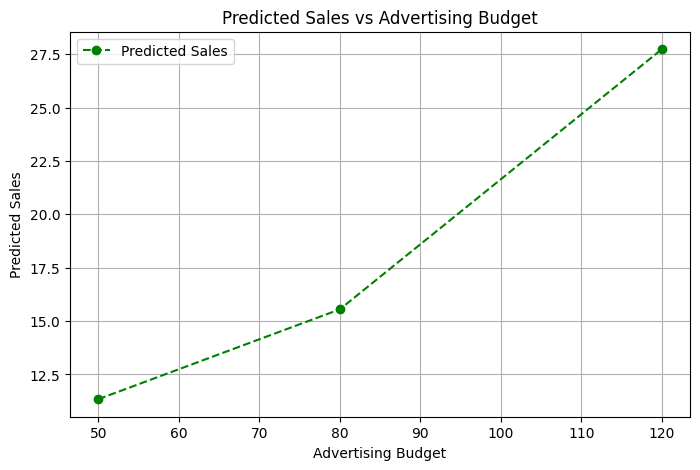

In [ ]:
# Flatten predictions for plotting
predicted_sales = predicted_sales.flatten()

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(new_data['Advertising_Budget'], predicted_sales, marker='o', linestyle='--', color='green', label='Predicted Sales')
plt.title('Predicted Sales vs Advertising Budget')
plt.xlabel('Advertising Budget')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.legend()
plt.show()